# Understanding Lego sets popularity


## 📖 Background
You recently applied to work as a data analyst intern at the famous Lego Group in Denmark. As part of the job interview process, you received the following take-home assignment:

You are asked to use the provided dataset to understand the popularity of different Lego sets and themes. The idea is to become familiarized with the data to be ready for an interview with a business stakeholder.

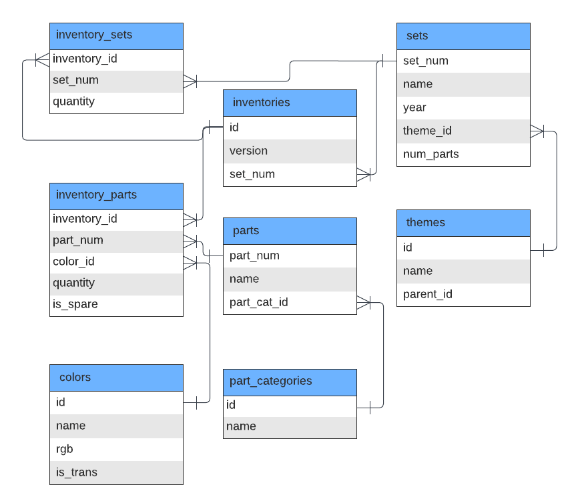

## 💾 The data

#### You received access to a database with the following tables. You can also see above a visualization of how the tables are related to each other. ([source](https://rebrickable.com/downloads)):

#### inventory_parts
- "inventory_id" - id of the inventory the part is in (as in the inventories table)
- "part_num" - unique id for the part (as in the parts table)
- "color_id" - id of the color
- "quantity" - the number of copies of the part included in the set
- "is_spare" - whether or not it is a spare part

#### parts
- "part_num" - unique id for the part (as in the inventory_parts table)
- "name" - name of the part
- "part_cat_id" - part category id (as in part_catagories table)

#### part_categories
- "id" - part category id (as in parts table)
- "name" - name of the category the part belongs to

#### colors
- "id" - id of the color (as in inventory_parts table)
- "name" - color name
- "rgb" - rgb code of the color
- "is_trans" - whether or not the part is transparent/translucent

#### inventories
- "id" - id of the inventory the part is in (as in the inventory_sets and inventory_parts tables)
- "version" - version number
- "set_num" - set number (as in sets table)

#### inventory_sets
- "inventory_id" - id of the inventory the part is in (as in the inventories table)
- "set_num" - set number (as in sets table)
- "quantity" - the quantity of sets included

#### sets
- "set_num" - unique set id (as in inventory_sets and inventories tables)
- "name" - the name of the set
- "year" - the year the set was published
- "theme_id" - the id of the theme the set belongs to (as in themes table)
- num-parts - the number of parts in the set

#### themes
- "id" - the id of the theme (as in the sets table)
- "name" - the name of the theme
- "parent_id" - the id of the larger theme, if there is one


***Acknowledgments**: Rebrickable.com*

## 1. What is the average number of Lego sets released per year?

In [4]:
SELECT AVG(average.sets_per_year) AS average_sets_per_year
FROM
(
    SELECT COUNT(set_num) AS sets_per_year
    FROM sets
    GROUP BY year
) AS average

,average_sets_per_year
0,176.863636


## 2. What is the average number of Lego parts per year?

In [5]:
SELECT AVG(average.parts_per_year) AS average_parts_per_year
FROM
(
    SELECT SUM(num_parts) AS parts_per_year
    FROM sets
    GROUP BY year
) AS average

,average_parts_per_year
0,28698.318182


## 3. Create a visualization for the average number of Lego parts per year.

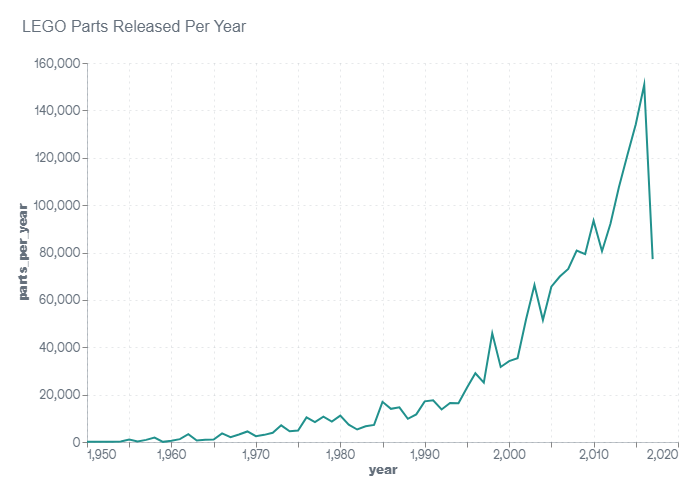

## 4. What are the 5 most popular colors used in Lego parts?

In [8]:
SELECT colors.name,COUNT(inventory_parts.color_id)
FROM colors
INNER JOIN inventory_parts
ON colors.id = inventory_parts.color_id
GROUP BY colors.name
ORDER BY COUNT(inventory_parts.color_id) DESC
LIMIT 5

,name,count
0,Black,115085
1,White,66536
2,Light Bluish Gray,55302
3,Red,50213
4,Dark Bluish Gray,43907


## 5. What proportion of Lego parts are transparent?

In [9]:
SELECT colors.is_trans, COUNT(*) * 100.0 / (SELECT COUNT(*) FROM colors INNER JOIN inventory_parts ON colors.id = inventory_parts.color_id) AS Percentage
FROM colors
INNER JOIN inventory_parts
ON colors.id = inventory_parts.color_id
GROUP BY colors.is_trans

,is_trans,percentage
0,False,93.739021
1,True,6.260979


## 6. What are the 5 rarest lego bricks?

In [13]:
SELECT part_categories.name,COUNT(part_categories.name)
FROM parts
INNER JOIN part_categories
ON parts.part_cat_id = part_categories.id
WHERE part_categories.name LIKE '%Brick%'
GROUP BY part_categories.name
ORDER BY COUNT(part_categories.name) ASC
LIMIT 5

,name,count
0,Technic Bricks,26
1,Bricks,93
2,Bricks Special,116
3,Bricks Wedged,198
4,Bricks Round and Cones,219


## 📖 Summary
* Provided Data shows non-uniform number of sets released per year with an average of nearly 176 sets/year
** **
* Constant increase in parts released per year till 2016 and decline afterwards.
** **
* Most Popular LEGO parts colors are:
   1. Black
   2. White
   3. Light Bluish Gray
   4. Red
   5. Dark Bluish Gray
** **
* Around 6.26% of LEGO parts manufactured are transparent.
  * Insights on popularity of transparent parts can be helpful regarding future manufacturing 
** **
* Rarest LEGO bricks appear to be following:
   1. Technic Bricks
   2. Simple Bricks
   3. Special Bricks
   4. Wedged Bricks
   5. "Round and Cones" Bricks
**** ****
* While most popular bricks are:
   1. Printed Bricks
   2. Sloped Bricks
   3. Curved Bricks